In [8]:
import pandas as pd
import numpy as pp
import seaborn as sns
from scipy import stats
import matplotlib.pyplot

In [22]:
data = pd.read_csv(r'D:\mata kuliah\analisis data eksploratif\Expanded_data_with_more_features.csv', sep= ",")
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


# Missing Value

# Mencari missing value

In [25]:
# mencari missing values
missing_value = data.isnull().sum()

# mencari jumlah baris non-missing values di setiap kolom
total_rows = data.count()

# output
print("missing values per kolom:")
print(missing_value)
print("\njumlah baris non-missing per kolom:")
print(total_rows)

missing values per kolom:
Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

jumlah baris non-missing per kolom:
Unnamed: 0             30641
Gender                 30641
EthnicGroup            28801
ParentEduc             28796
LunchType              30641
TestPrep               28811
ParentMaritalStatus    29451
PracticeSport          30010
IsFirstChild           29737
NrSiblings             29069
TransportMeans         27507
WklyStudyHours         29686
MathScore              30641
ReadingScore           30641
WritingScore           30641
dtype: int64


Terdapat 8 variabel yang missing value, terdapat 1840 missing value pada variabel ethnic group, terdapat 1845 missing value pada variabel parent education, terdapat 1830 missing value pada variabel test preparation, terdapat 1190 missing value pada variabel parent marital status, terdapat 904 missing value pada variabel is first child, terdapat 1572 missing value pada variabel nr siblings, terdapat 3134 missing value pada variabel transport means, terdapat 955 missing value pada variabel weekly study hours

# Mengatasi missing value

In [26]:
# Imputasi data kategorikal dengan modus (nilai paling sering muncul)
for col in ['EthnicGroup', 'ParentEduc', 'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 
            'IsFirstChild', 'TransportMeans', 'WklyStudyHours']:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Imputasi data numerik dengan median
data['NrSiblings'].fillna(data['NrSiblings'].median(), inplace=True)

# Mengecek apakah masih ada missing value
print(data.isnull().sum())

Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64


C:\Users\asus\AppData\Local\Temp\ipykernel_17448\1497742103.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
C:\Users\asus\AppData\Local\Temp\ipykernel_17448\1497742103.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For ex

Kode di atas mengisi missing value pada kolom kategorikal dengan modus dan kolom numerik dengan median

# Dummy variabel

Karena sudah tidak ada missing value maka lanjut dengan dummy variabel, mengubah kolom kategorikal menjadi variabel dummy

In [40]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore,Writingcore,Gender_male,EthnicGroup_group B,EthnicGroup_group C,EthnicGroup_group D,...,TestPrep_none,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,PracticeSport_regularly,PracticeSport_sometimes,IsFirstChild_yes,TransportMeans_school_bus,WklyStudyHours_< 5,WklyStudyHours_> 10
0,0,3.0,71,71,74,74,False,False,True,False,...,True,True,False,False,True,False,True,True,True,False
1,1,0.0,69,90,88,88,False,False,True,False,...,True,True,False,False,False,True,True,True,False,False
2,2,4.0,87,93,91,91,False,True,False,False,...,True,False,True,False,False,True,True,True,True,False
3,3,1.0,45,56,42,43,True,False,False,False,...,True,True,False,False,False,False,False,True,False,False
4,4,0.0,76,78,75,75,True,False,True,False,...,True,True,False,False,False,True,True,True,False,False


# Outlier

Mencari outlier menggunakan boxplot

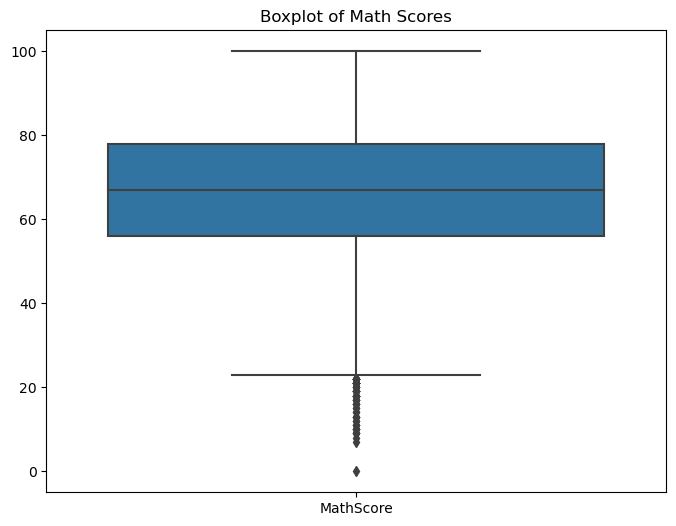

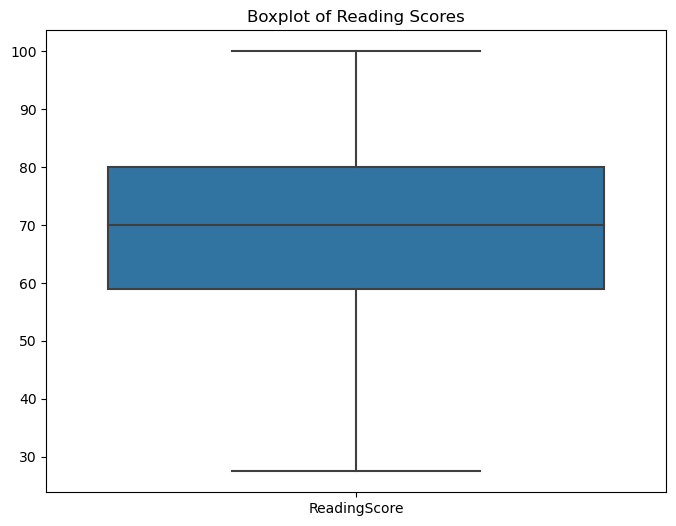

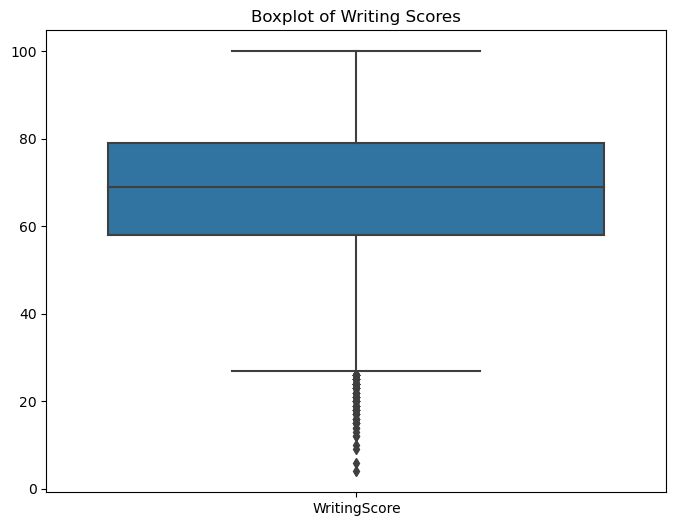

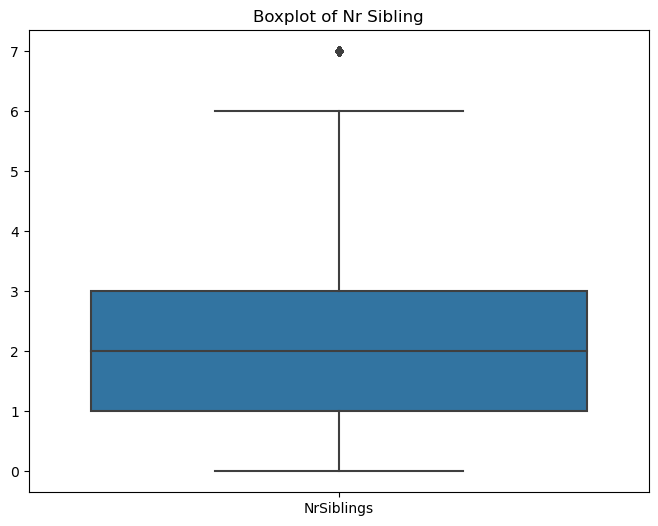

In [41]:
# Membuat boxplot untuk beberapa kolom
plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['MathScore']])
plt.title('Boxplot of Math Scores')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['ReadingScore']])
plt.title('Boxplot of Reading Scores')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['WritingScore']])
plt.title('Boxplot of Writing Scores')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(data=data[['NrSiblings']])
plt.title('Boxplot of Nr Sibling')
plt.show()

Terdapat outlier di ketiga variabel di atas

Menggunakan metode IQR (Interquartile Range) untuk mendeteksi outlier pada kolom numerik dengan menghitung rentang antara Q1 dan Q3

In [48]:
import numpy as np

# variabel MathScore
col = 'MathScore'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Menampilkan outlier
print(f"Outliers in {col}:")
print(outliers)

# Menampilkan jumlah outlier
print(f"Total number of outliers in {col}: {outliers.shape[0]}")

Outliers in MathScore:
       Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
17             17  female     group B    some high school  free/reduced   
55             59  female     group C    some high school  free/reduced   
136           145  female     group C        some college  free/reduced   
751           787  female     group B        some college      standard   
928           980  female     group B         high school  free/reduced   
...           ...     ...         ...                 ...           ...   
28536         445  female     group C    some high school  free/reduced   
28544         453  female     group C        some college  free/reduced   
28597         510  female     group D         high school  free/reduced   
29000         947    male     group A        some college  free/reduced   
29654         824  female     group B  associate's degree  free/reduced   

        TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings 

In [47]:
import numpy as np

col = 'WritingScore'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Menampilkan outlier
print(f"Outliers in {col}:")
print(outliers)

# Menampilkan jumlah outlier
print(f"Total number of outliers in {col}: {outliers.shape[0]}")

Outliers in WritingScore:
       Unnamed: 0  Gender EthnicGroup          ParentEduc     LunchType  \
55             59  female     group C    some high school  free/reduced   
69             76    male     group E    some high school      standard   
308           327    male     group A        some college  free/reduced   
319           338  female     group B    some high school  free/reduced   
565           596    male     group B         high school  free/reduced   
...           ...     ...         ...                 ...           ...   
29274         376  female     group E        some college  free/reduced   
29817         843    male     group D         high school  free/reduced   
30389         834    male     group B  associate's degree  free/reduced   
30478         671    male     group D  associate's degree      standard   
30630         760    male     group B  associate's degree  free/reduced   

      TestPrep ParentMaritalStatus PracticeSport IsFirstChild  NrSiblings

In [46]:
import numpy as np

col = 'ReadingScore'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Menampilkan outlier
print(f"Outliers in {col}:")
print(outliers)

# Menampilkan jumlah outlier
print(f"Total number of outliers in {col}: {outliers.shape[0]}")

Outliers in ReadingScore:
Empty DataFrame
Columns: [Unnamed: 0, Gender, EthnicGroup, ParentEduc, LunchType, TestPrep, ParentMaritalStatus, PracticeSport, IsFirstChild, NrSiblings, TransportMeans, WklyStudyHours, MathScore, ReadingScore, WritingScore]
Index: []
Total number of outliers in ReadingScore: 0


In [44]:
import numpy as np

col = 'NrSiblings'

# Menghitung kuartil pertama (Q1) dan kuartil ketiga (Q3)
Q1 = data[col].quantile(0.25)
Q3 = data[col].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk mendeteksi outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menemukan outlier
outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]

# Menampilkan outlier
print(f"Outliers in {col}:")
print(outliers)

# Menampilkan jumlah outlier
print(f"Total number of outliers in {col}: {outliers.shape[0]}")

Outliers in NrSiblings:
       Unnamed: 0  Gender EthnicGroup    ParentEduc     LunchType   TestPrep  \
91            100    male     group B  some college      standard       none   
183           197    male     group E   high school  free/reduced       none   
287           305    male     group A  some college      standard       none   
409           435    male     group C  some college  free/reduced  completed   
441           467    male     group A   high school  free/reduced  completed   
...           ...     ...         ...           ...           ...        ...   
28284         177    male     group B  some college      standard       none   
28310         206  female     group E  some college      standard       none   
28433         336  female     group B   high school      standard  completed   
28835         770  female     group D  some college      standard       none   
28893         835    male     group B  some college      standard       none   

      ParentMar

# Mengatasi outlier

Menggunakan metode winsorizing yaitu membatasi nilai ekstrem pada batas tertentu sehingga mereka tidak lagi dianggap outlier. Metode ini memotong nilai-nilai yang terlalu rendah atau tinggi berdasarkan persentil tertentu

Text(0.5, 1.0, 'Boxplot Nr Siblings setelah di winsorize')

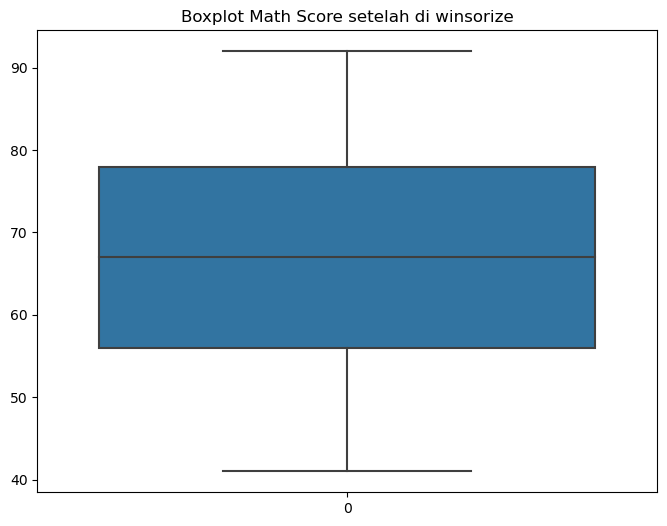

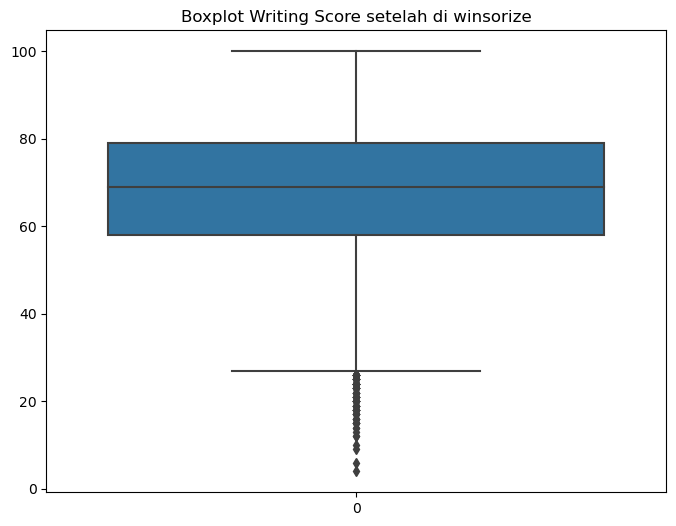

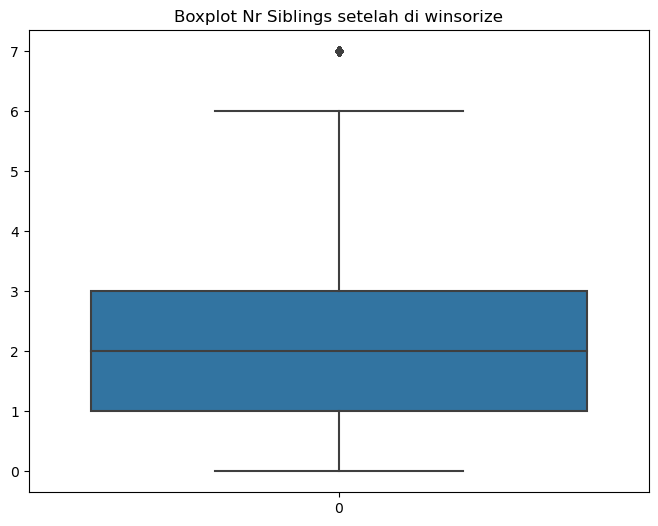

In [49]:
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt

df['MathScore'] = winsorize(df['MathScore'], limits=[0.05, 0.05])
df['ReadingScore'] = winsorize(df['ReadingScore'], limits=[0.05, 0.05])
df['Writingcore'] = winsorize(df['WritingScore'], limits=[0.05, 0.05])

plt.figure(figsize=(8,6))
sns.boxplot(df['MathScore'])
plt.title('Boxplot Math Score setelah di winsorize')

plt.figure(figsize=(8,6))
sns.boxplot(df['WritingScore'])
plt.title('Boxplot Writing Score setelah di winsorize')

plt.figure(figsize=(8,6))
sns.boxplot(df['NrSiblings'])
plt.title('Boxplot Nr Siblings setelah di winsorize')

# Kategorisasi variabel

1. Kategorisasi Nr siblings (banyak saudara kandung)
0-3 : normal
4 < : banyak

2. Kategorisasi math score
100 - 81 : bagus
80 - 61 : jelek
60 - 0 : sangat jelek

3. Kategorisasi reading score
100 - 80 : bagus
79 - 60 : jelek
59 - 0 : sangat jelek

4. Kategorisasi writing score
100 - 80 : bagus
79 - 60 : jelek
59 - 0 : sangat jelek

In [52]:
# Membuat kategori secara manual
bins = [0, 60, 80, 100]  # Rentang nilai untuk setiap kategori
labels = ['rendah', 'sedang', 'tinggi']  # Label untuk setiap kategori
data['MathScoreCategory'] = pd.cut(data['MathScore'], bins=bins, labels=labels, right=False)

# Melihat hasil
print(data[['MathScore', 'MathScoreCategory']].head())

   MathScore MathScoreCategory
0         71            sedang
1         69            sedang
2         87            tinggi
3         45            rendah
4         76            sedang


In [54]:
# Membuat kategori secara manual
bins = [0, 60, 80, 100]  # Rentang nilai untuk setiap kategori
labels = ['rendah', 'sedang', 'tinggi']  # Label untuk setiap kategori
data['ReadingScoreCategory'] = pd.cut(data['ReadingScore'], bins=bins, labels=labels, right=False)

# Melihat hasil
print(data[['ReadingScore', 'ReadingScoreCategory']].head())

   ReadingScore ReadingScoreCategory
0          71.0               sedang
1          90.0               tinggi
2          93.0               tinggi
3          56.0               rendah
4          78.0               sedang


In [56]:
# Membuat kategori secara manual
bins = [0, 60, 80, 100]  # Rentang nilai untuk setiap kategori
labels = ['rendah', 'sedang', 'tinggi']  # Label untuk setiap kategori
data['WritingScoreCategory'] = pd.cut(data['WritingScore'], bins=bins, labels=labels, right=False)

# Melihat hasil
print(data[['WritingScore', 'WritingScoreCategory']].head())

   WritingScore WritingScoreCategory
0            74               sedang
1            88               tinggi
2            91               tinggi
3            42               rendah
4            75               sedang


In [57]:
# Menentukan bins dan labels untuk mengkategorikan jumlah saudara kandung
bins = [0, 1, 3, 5, 8]  # 0-1 saudara, 1-3 saudara, 3-5 saudara, 5-8 saudara
labels = ['Tidak Ada Saudara', 'Sedikit Saudara', 'Cukup Saudara', 'Banyak Saudara']

# Mengkategorikan variabel NrSiblings
data['NrSiblingsCategory'] = pd.cut(data['NrSiblings'], bins=bins, labels=labels, right=False)

# Melihat hasil kategorisasi
print(data[['NrSiblings', 'NrSiblingsCategory']].head())

   NrSiblings NrSiblingsCategory
0         3.0      Cukup Saudara
1         0.0  Tidak Ada Saudara
2         4.0      Cukup Saudara
3         1.0    Sedikit Saudara
4         0.0  Tidak Ada Saudara


# Transformasi data

C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

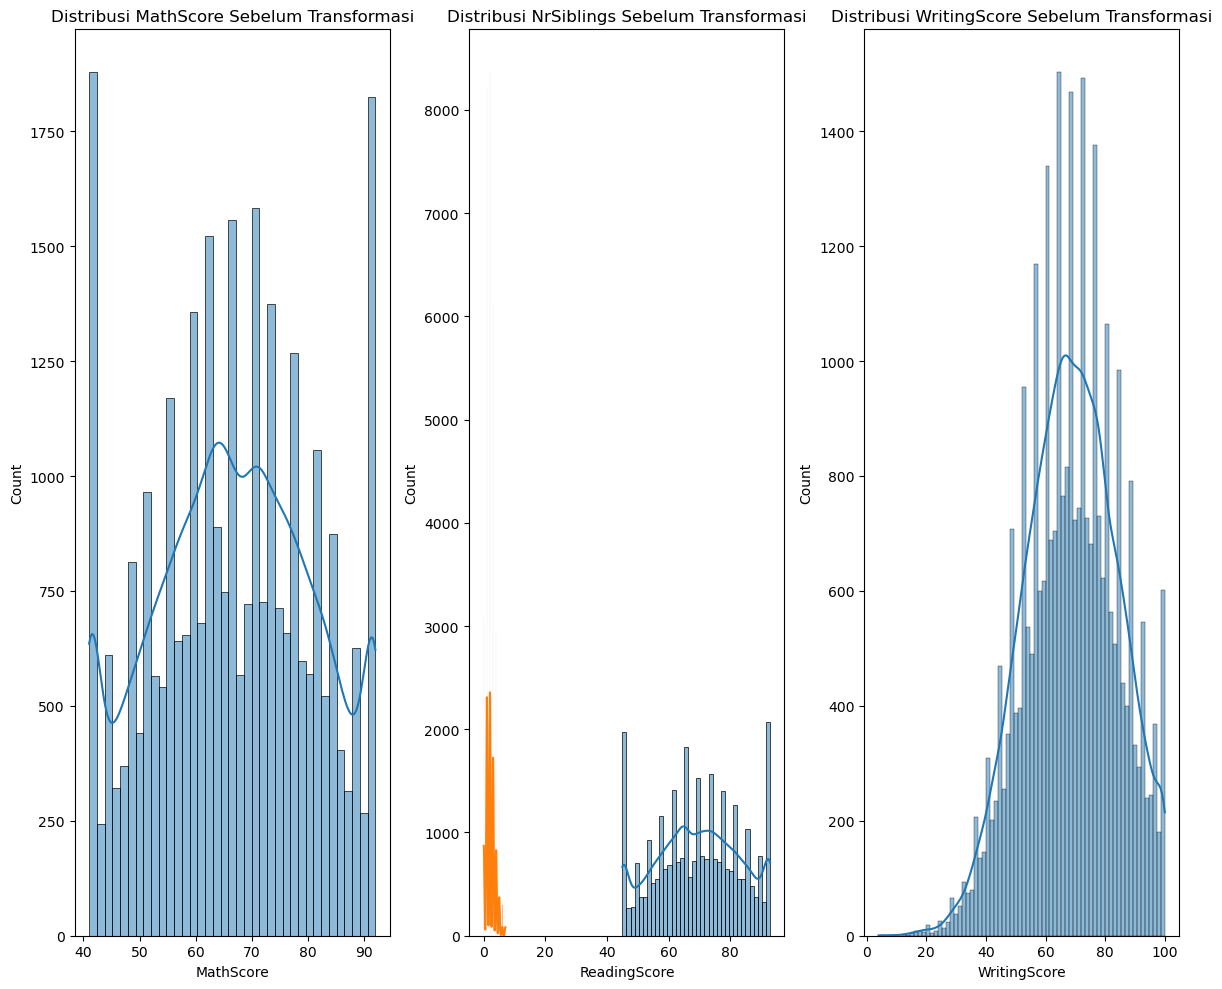

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
sns.histplot(df['MathScore'], kde=True)
plt.title('Distribusi MathScore Sebelum Transformasi')

plt.subplot(1, 3, 2)
sns.histplot(df['ReadingScore'], kde=True)
plt.title('Distribusi ReadingScore Sebelum Transformasi')

plt.subplot(1, 3, 3)
sns.histplot(df['WritingScore'], kde=True)
plt.title('Distribusi WritingScore Sebelum Transformasi')

plt.subplot(1, 3, 2)
sns.histplot(df['NrSiblings'], kde=True)
plt.title('Distribusi NrSiblings Sebelum Transformasi')

plt.tight_layout()
plt.show()

In [62]:
scaler = StandardScaler()

df[['MathScore_scaled', 'ReadingScore_scaled', 'WritingScore_scaled', 'NrSiblings_scaled']] = scaler.fit_transform(df[['MathScore', 'ReadingScore', 'WritingScore', 'NrSiblings']])

print(df[['MathScore', 'MathScore_scaled', 'ReadingScore', 'ReadingScore_scaled', 'WritingScore', 'WritingScore_scaled', 'NrSiblings', 'NrSiblings_scaled']].head())

   MathScore  MathScore_scaled  ReadingScore  ReadingScore_scaled  \
0         71          0.301262            71             0.108514   
1         69          0.160918            90             1.498928   
2         87          1.424014            93             1.718467   
3         45         -1.523209            56            -0.989180   
4         76          0.652122            78             0.620772   

   WritingScore  WritingScore_scaled  NrSiblings  NrSiblings_scaled  
0            74             0.361412         3.0           0.606462  
1            88             1.267955         0.0          -1.505198  
2            91             1.462215         4.0           1.310349  
3            42            -1.710688         1.0          -0.801311  
4            75             0.426165         0.0          -1.505198  


C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\asus\Documents\ANACONDA\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert in

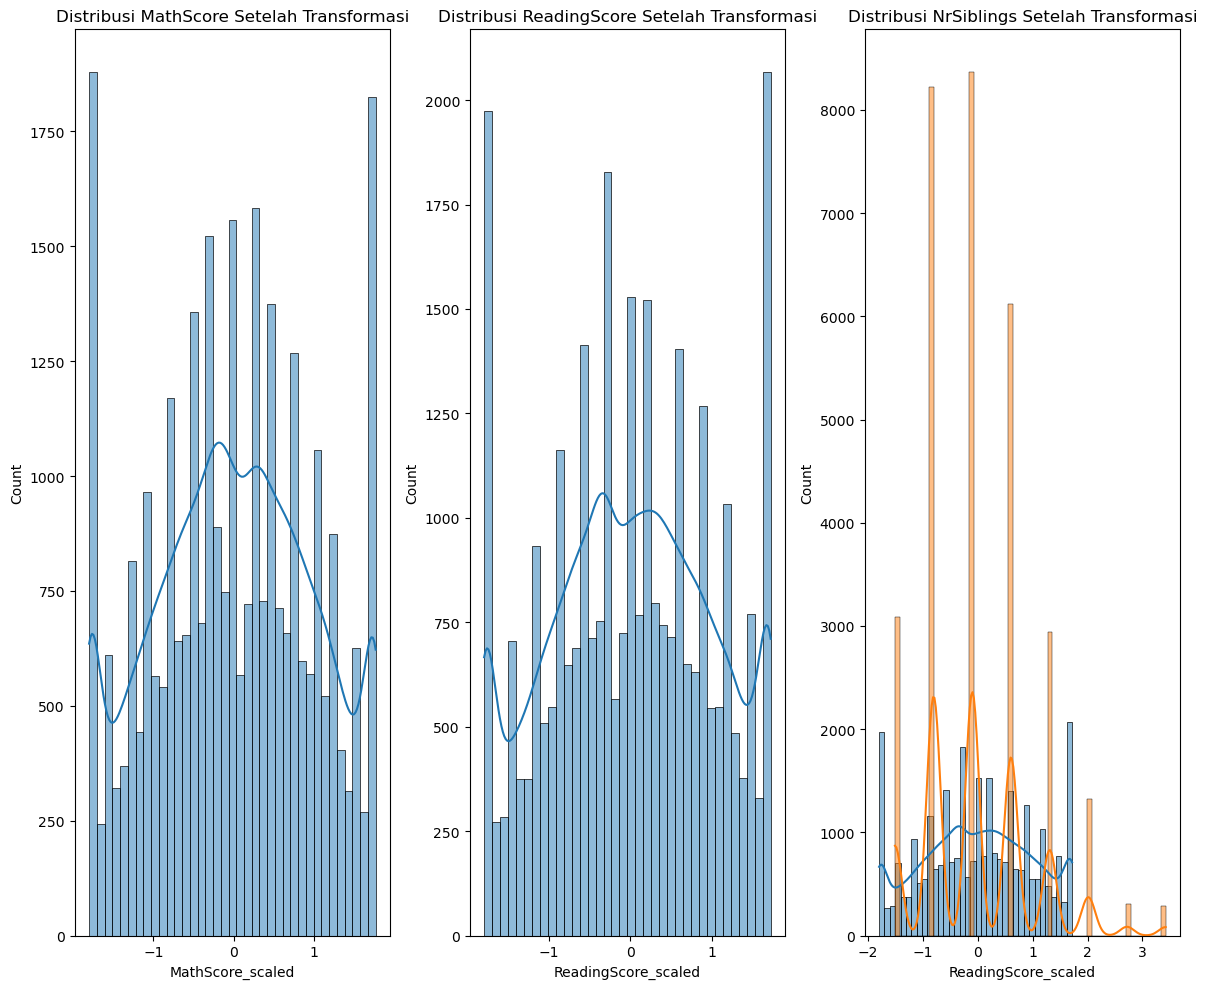

In [64]:
plt.figure(figsize=(12, 10))

plt.subplot(1, 3, 1)
sns.histplot(df['MathScore_scaled'], kde=True)
plt.title('Distribusi MathScore Setelah Transformasi')

plt.subplot(1, 3, 2)
sns.histplot(df['ReadingScore_scaled'], kde=True)
plt.title('Distribusi ReadingScore Setelah Transformasi')

plt.subplot(1, 3, 3)
sns.histplot(df['ReadingScore_scaled'], kde=True)
plt.title('Distribusi ReadingScore Setelah Transformasi')

plt.subplot(1, 3, 3)
sns.histplot(df['NrSiblings_scaled'], kde=True)
plt.title('Distribusi NrSiblings Setelah Transformasi')

plt.tight_layout()
plt.show()